<a href="https://colab.research.google.com/github/DDxk/3D-convolutional-speaker-recognition/blob/master/%E5%B7%A5%E4%B8%9A%E8%92%B8%E6%B1%BD%E6%B5%8B%E9%87%8F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

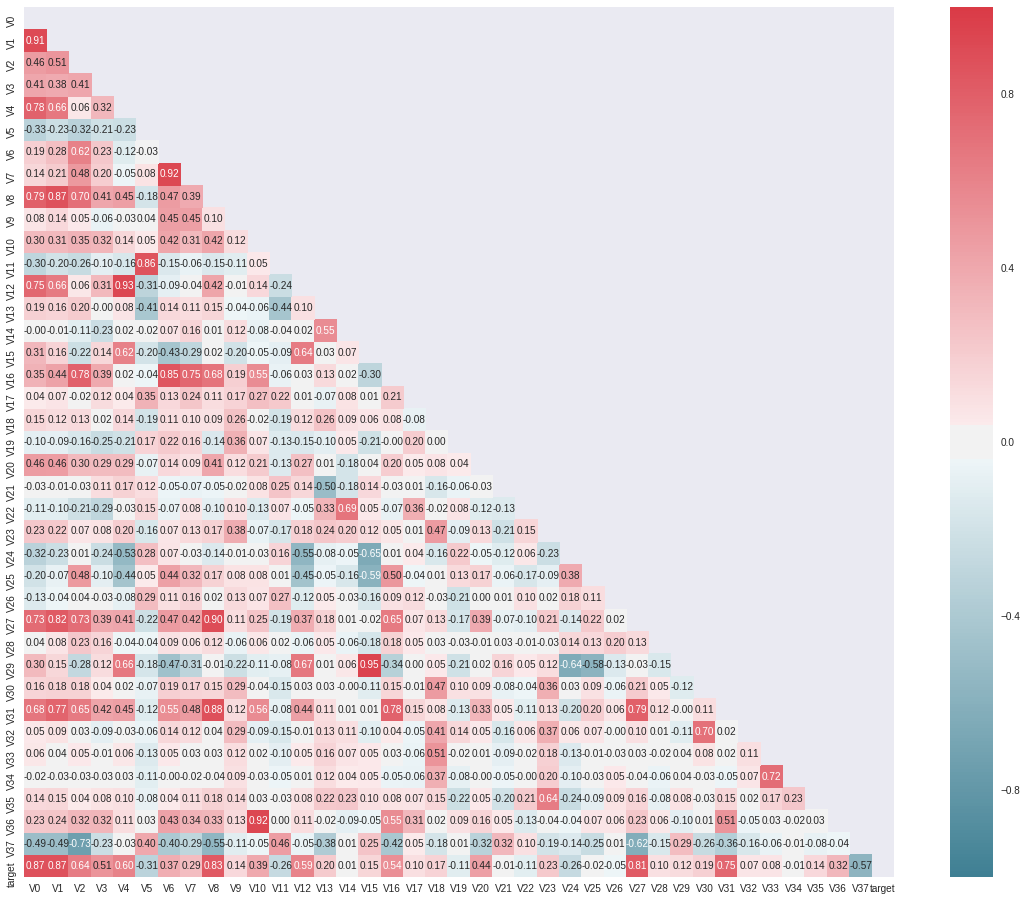

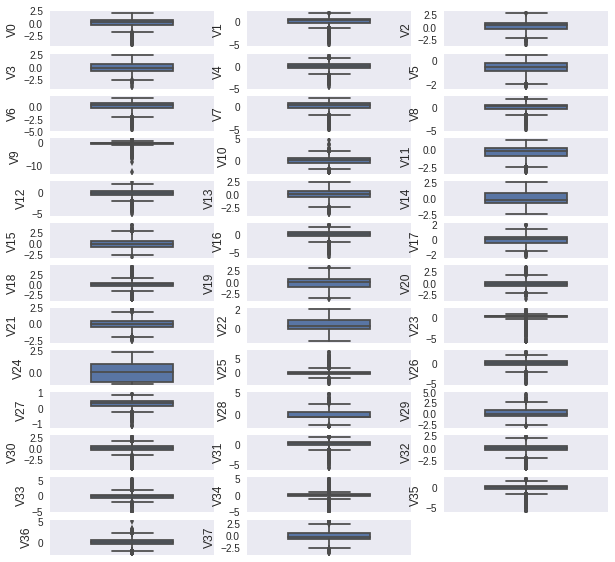


 mu = 0.13 and sigma = 0.98



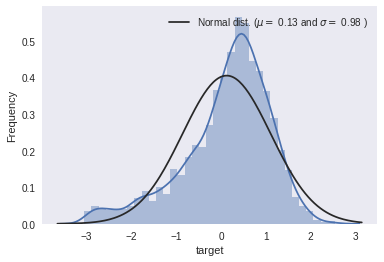

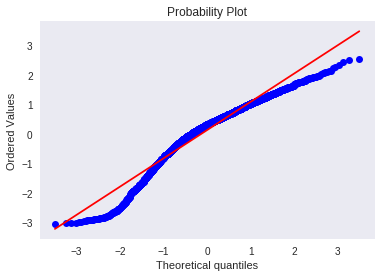

V0        0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
V29       0.0
V30       0.0
V31       0.0
V32       0.0
V33       0.0
V34       0.0
V35       0.0
V36       0.0
V37       0.0
target    0.0
dtype: float64


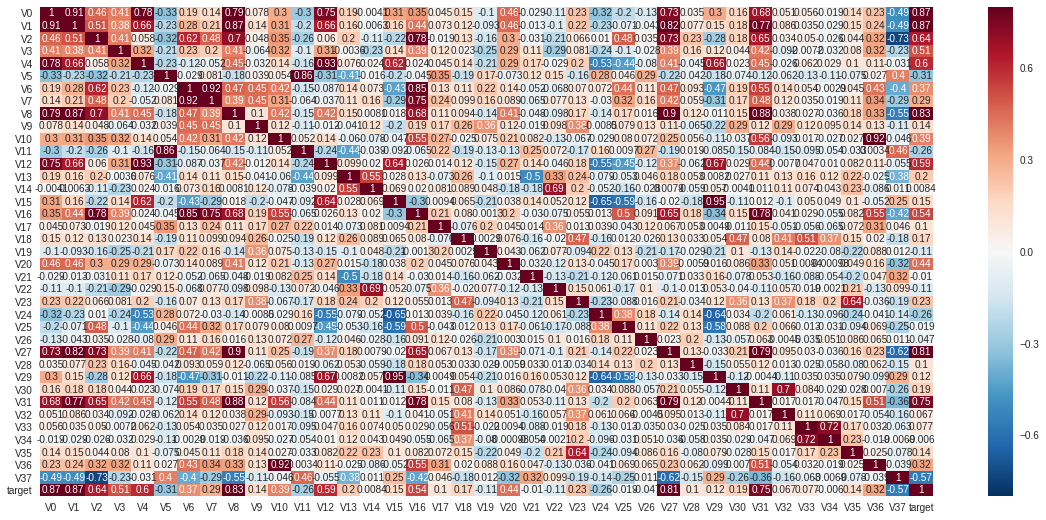

0.10895188423219443
over


In [1]:
# 导入包
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import pca
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

color = sns.color_palette()  # sns调色板
sns.set_style('dark')  # 设置主题模式
# 1、数据获取
# 2、数据处理
# 3、模型训练
# 4、结果预测
warnings.filterwarnings('ignore')  # 忽略警告（看到一堆警告比较恶心）

'''数据获取'''
df = pd.read_table("/content/zhengqi_train.txt")
df_test = pd.read_table("/content/zhengqi_test.txt")

'''数据处理'''
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = df.columns.tolist()[:39]  # 列表头
mcorr = df[colnm].corr()  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

# 画箱式图
colnm = df.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(10, 10))  # 指定绘图对象宽度和高度
for i in range(38):
    plt.subplot(13, 3, i + 1)  # 13行3列子图
    sns.boxplot(df[colnm[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(colnm[i], fontsize=12)
plt.show()

# 画正太分布图
sns.distplot(df['target'], fit=norm)
(mu, sigma) = norm.fit(df['target'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)
plt.show()

# 查看是否有缺失值（无缺失值 无需补植）
train_data_missing = (df.isnull().sum() / len(df)) * 100
print(train_data_missing)

# 分析特性与目标值的相关性 热力图
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)
plt.show()

# 对训练数据处理，分离出特征和标签
X = df.values[:, 0:-1]
Y = df.values[:, -1]
X1_test = df_test.values

# PCA数据处理
pca = pca.PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)
X1_pca = pca.transform(X1_test)

'''模型训练'''
# 分离出训练集和测试集，并用梯度提升回归训练
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=40)
myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)
myGBR.fit(X_train, Y_train)
Y_pred = myGBR.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

'''结果预测'''
y1_test = myGBR.predict(X1_pca)

res_pd = pd.DataFrame(y1_test, columns=['target'])
res_pd.to_csv("0.10895.csv", index=False, header=False)
print("over")
